In [18]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [19]:
data = pd.read_csv('6.csv')
data.head

<bound method NDFrame.head of      age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0     30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1     33;"services";"married";"secondary";"no";4789;...                                                                                                  
2     35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3     30;"management";"married";"tertiary";"no";1476...                                                                                                  
4     59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  
...                                           

In [20]:
data.tail

<bound method NDFrame.tail of      age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0     30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1     33;"services";"married";"secondary";"no";4789;...                                                                                                  
2     35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3     30;"management";"married";"tertiary";"no";1476...                                                                                                  
4     59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  
...                                           

In [21]:
import pandas as pd

# Load dataset with correct delimiter
file_path = "6.csv"  # Replace with actual file path
df = pd.read_csv(file_path, delimiter=";")

# Remove extra quotes
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

# Check for missing values
df = df.dropna()  # Remove rows with missing values if any

# Save cleaned dataset
df.to_csv("bank_cleaned.csv", index=False)

print("Dataset cleaned and saved as 'cleaned_dataset.csv'")


C:\Users\swaru\AppData\Local\Temp\ipykernel_2864\4094792157.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


Dataset cleaned and saved as 'cleaned_dataset.csv'


In [22]:
data=pd.read_csv('bank_cleaned.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [23]:
data['default'] = data['default'].map({'no': 0, 'yes': 1})
data['default'].fillna(data['default'].median(), inplace=True)  # Replace unknowns with the median


C:\Users\swaru\AppData\Local\Temp\ipykernel_2864\2455434740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['default'].fillna(data['default'].median(), inplace=True)  # Replace unknowns with the median


In [24]:
# Split the data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Load dataset (replace with actual file path)
file_path = "6.csv"  # Update this path
df = pd.read_csv(file_path, delimiter=";")

# Convert categorical columns using One-Hot Encoding
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split features and labels
X = df.drop(columns=["y_yes"])  # Target column (y) is now "y_yes"
y = df["y_yes"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("Model training successful!")


Model training successful!


In [28]:
y_pred = rf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9005524861878453


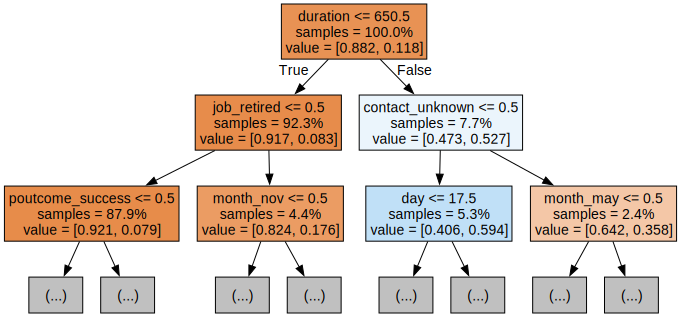

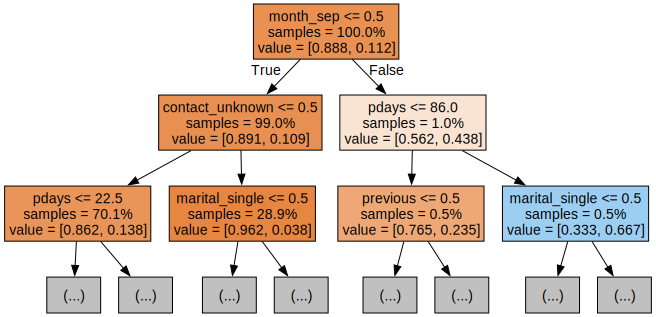

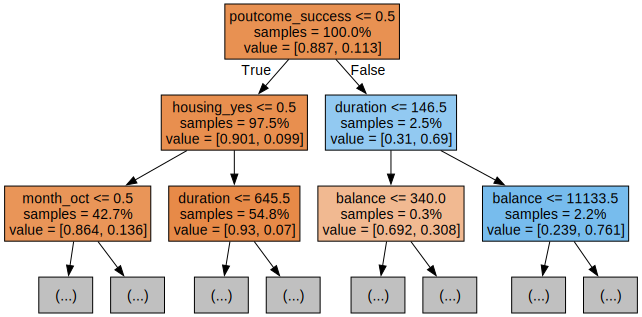

In [31]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [32]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA2BF701D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA2BFFF020>})

In [33]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 448}


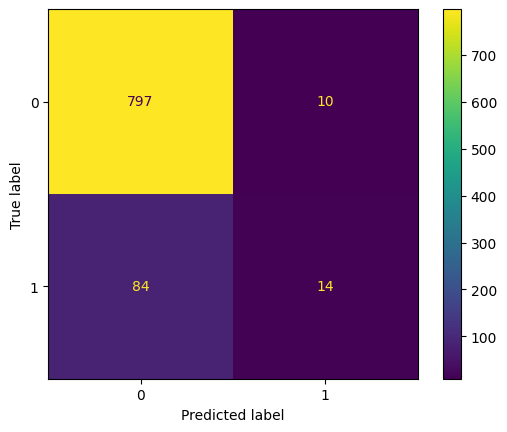

In [35]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();